# Instruction

- Please do not spend more than a few hours on this test. The focus is on analytical approach and exploration rather than development of a performative model. <br>
- In this role, you will be responsible for extracting crucial insight that feeds into strategic decision making. You will use your Python skills to load, transform and analyse datasets that lead to key results. <br>


We would like you to; 

A. Perform data analysis of the data provided and highlight 5 interesting findings. <br>
B. Identify the personal traits, found in ‘credit_features.csv’, that correlate with a successful customer outcome. <br>
C. Present your solution. <br>

# What is the aim of this analysis?

Demonstrating / explaining how you approach the problem is more important
than working code.
Be prepared to discuss: <br>
● Analysis methodology <br>
● Describe the key indicators of loan success <br>
● Anomalous findings <br>
● Recommendation for increasing successful applicants <br>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', 50)

In [2]:
def data_preprocessing_application(df):
    # Convert columns
    df["ApplicationDate"] = pd.to_datetime(df["ApplicationDate"], dayfirst=True)
    df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")
    df["Term"] = pd.to_numeric(df["Term"], errors="coerce")

    # Create a Month column
    df["Month"] = df["ApplicationDate"].dt.to_period("M").dt.to_timestamp()

    # Success Label Column
    df["SuccessLabel"] = df["Success"].map({1: "Success", 0: "Fail"})

    return df

# Exploratory Data Analysis

## Loan Application Details Understanding

In [3]:
# Data type of loan applications throughout 2020 and a label indicating success or rejection.
application_sample = pd.read_csv('data/application_samples.csv')

# preprocessing
application_sample = data_preprocessing_application(application_sample)

# Create a null row matching existing columns
# null_row = {col: None for col in application_sample.columns}

# Append it
# application_sample = pd.concat([application_sample, pd.DataFrame([null_row])], ignore_index=True)

display(application_sample.info())
print('--------------------------------')

# show sample data
display(application_sample.tail())
print('--------------------------------')

# show data distribution 
display(application_sample.Success.value_counts())

# Application Date Range (Double-check date range of application)
display(application_sample.ApplicationDate.min())
display(application_sample.ApplicationDate.max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   UID              8847 non-null   int64         
 1   ApplicationDate  8847 non-null   datetime64[ns]
 2   Amount           8847 non-null   int64         
 3   Term             8847 non-null   int64         
 4   EmploymentType   8847 non-null   object        
 5   LoanPurpose      8847 non-null   object        
 6   Success          8847 non-null   int64         
 7   Month            8847 non-null   datetime64[ns]
 8   SuccessLabel     8847 non-null   object        
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 622.2+ KB


None

--------------------------------


,UID,ApplicationDate,Amount,Term,EmploymentType,LoanPurpose,Success,Month,SuccessLabel
8842,8681053,2020-11-17,5000,60,Employed - full time,Wedding,0,2020-11-01,Fail
8843,8768469,2020-11-20,8000,24,Employed - full time,Wedding,0,2020-11-01,Fail
8844,8794971,2020-11-22,1000,36,Employed - full time,Wedding deposit,0,2020-11-01,Fail
8845,8875138,2020-11-24,10000,60,Self employed,Wedding,0,2020-11-01,Fail
8846,9134889,2020-12-05,20000,60,Employed - full time,wedding,0,2020-12-01,Fail


--------------------------------


Success
0    7925
1     922
Name: count, dtype: int64

Timestamp('2020-01-01 00:00:00')

Timestamp('2020-12-31 00:00:00')

In [4]:
data_dictionary = pd.read_csv('data/data_dictionary.csv')
data_dictionary

,Name,Description
0,UID,unique identifier
1,Application Date,Date of loan application
2,Amount,Amount requested by applicant
3,Term,Repayment period requested by applicant
4,Employment Type,Stated employment
5,LoanPurpose,Purpose of loan
6,Success,Applicant successful
7,ALL_AgeOfOldestAccount,Age of oldest accounts
8,ALL_AgeOfYoungestAccount,Age of youngest accounts
9,ALL_Count,No. of accounts


### Count the number of applications each month, how many of them succeed how many of them failed.

In [5]:
# Helper for bar labels
def add_bar_labels(ax):
    for container in ax.containers:
        ax.bar_label(container, padding=2, fmt="%.0f")

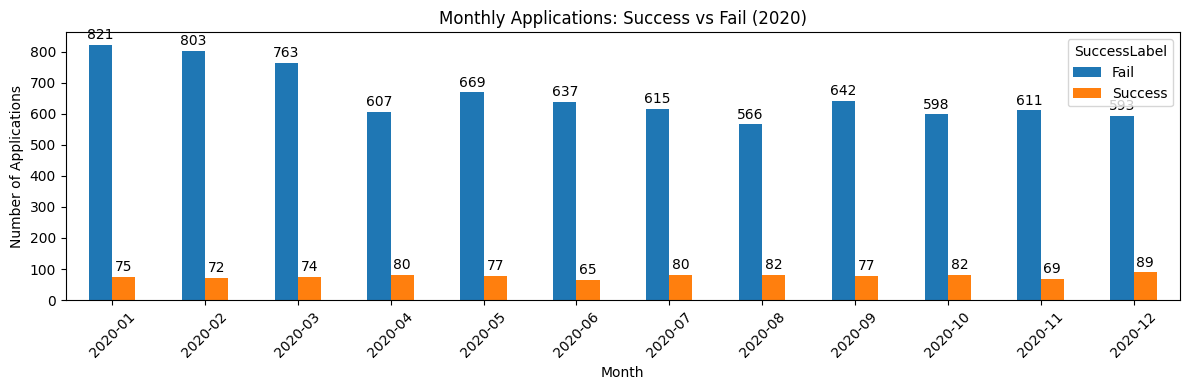

In [38]:
monthly_count = (
    application_sample.groupby(["Month", "SuccessLabel"])["UID"]
           .count()
           .unstack(fill_value=0)
)

fig, ax = plt.subplots(figsize=(12, 4))
monthly_count.index = monthly_count.index.strftime("%Y-%m")
monthly_count.plot(kind="bar", ax=ax)
ax.set_title("Monthly Applications: Success vs Fail (2020)")
ax.set_xlabel("Month")
ax.set_ylabel("Number of Applications")
plt.xticks(rotation=45)
add_bar_labels(ax)
plt.tight_layout()
plt.show()

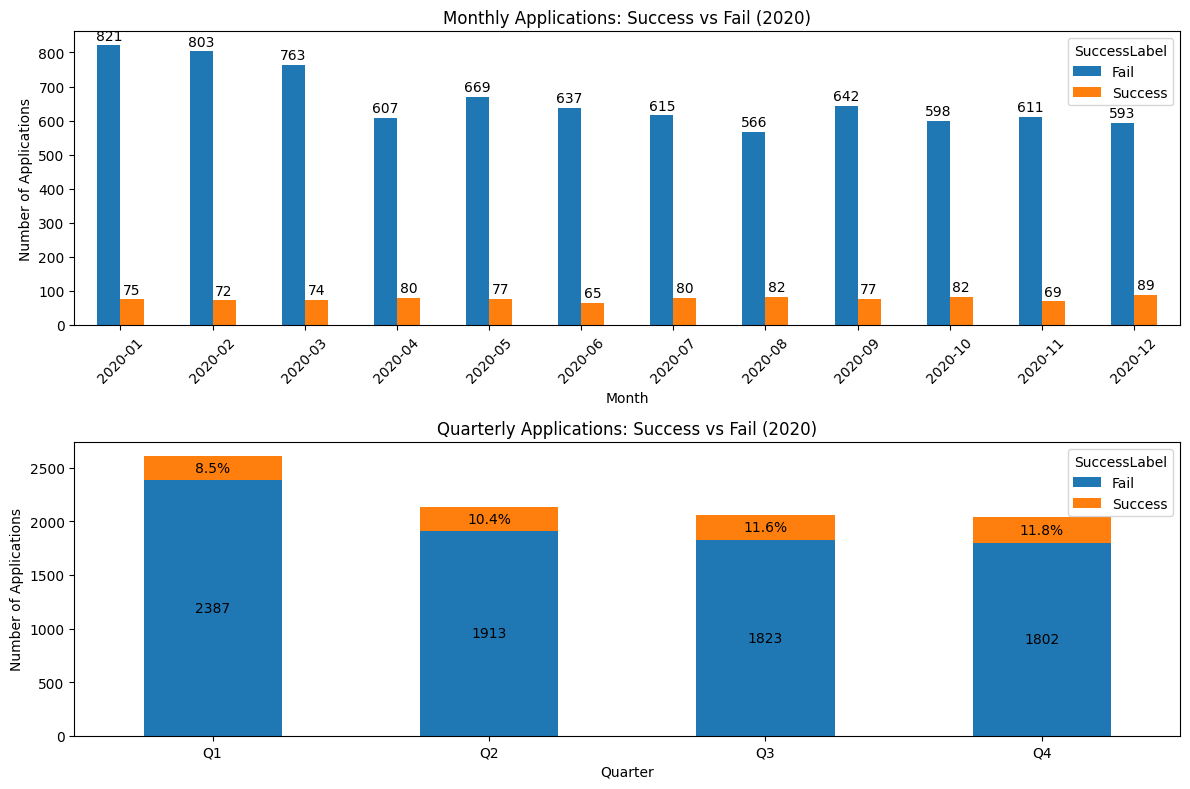

In [36]:
# Monthly data
monthly_count = (
    application_sample.groupby(["Month", "SuccessLabel"])["UID"]
           .count()
           .unstack(fill_value=0)
)

# Quarterly data
application_sample["Quarter"] = application_sample["Month"].dt.quarter
quarterly_count = (
    application_sample.groupby(["Quarter", "SuccessLabel"])["UID"]
           .count()
           .unstack(fill_value=0)
)

# Calculate quarterly success percentage
quarterly_count["Total"] = quarterly_count["Fail"] + quarterly_count["Success"]
quarterly_count["Success_Pct"] = (quarterly_count["Success"] / quarterly_count["Total"] * 100).round(1)

# Create figure with 2 rows
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# ===== Row 1: Monthly Applications =====
ax1 = axes[0]
monthly_count.index = monthly_count.index.strftime("%Y-%m")
monthly_count.plot(kind="bar", ax=ax1)
ax1.set_title("Monthly Applications: Success vs Fail (2020)")
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of Applications")
ax1.tick_params(axis='x', rotation=45)
add_bar_labels(ax1)

# ===== Row 2: Quarterly Applications with Success % =====
ax2 = axes[1]
quarterly_count.index = ["Q1", "Q2", "Q3", "Q4"]
quarterly_count[["Fail", "Success"]].plot(kind="bar", stacked=True, ax=ax2)
ax2.set_title("Quarterly Applications: Success vs Fail (2020)")
ax2.set_xlabel("Quarter")
ax2.set_ylabel("Number of Applications")
ax2.tick_params(axis='x', rotation=0)

# Labels: Fail count + Success percentage
bars_fail, bars_success = ax2.containers
ax2.bar_label(bars_fail, labels=quarterly_count["Fail"].astype(int), label_type="center")
ax2.bar_label(bars_success, labels=[f"{p}%" for p in quarterly_count["Success_Pct"]], label_type="center")

plt.tight_layout()
plt.show()

### Sum the total amount each month, how many of them succeed how many of them failed.

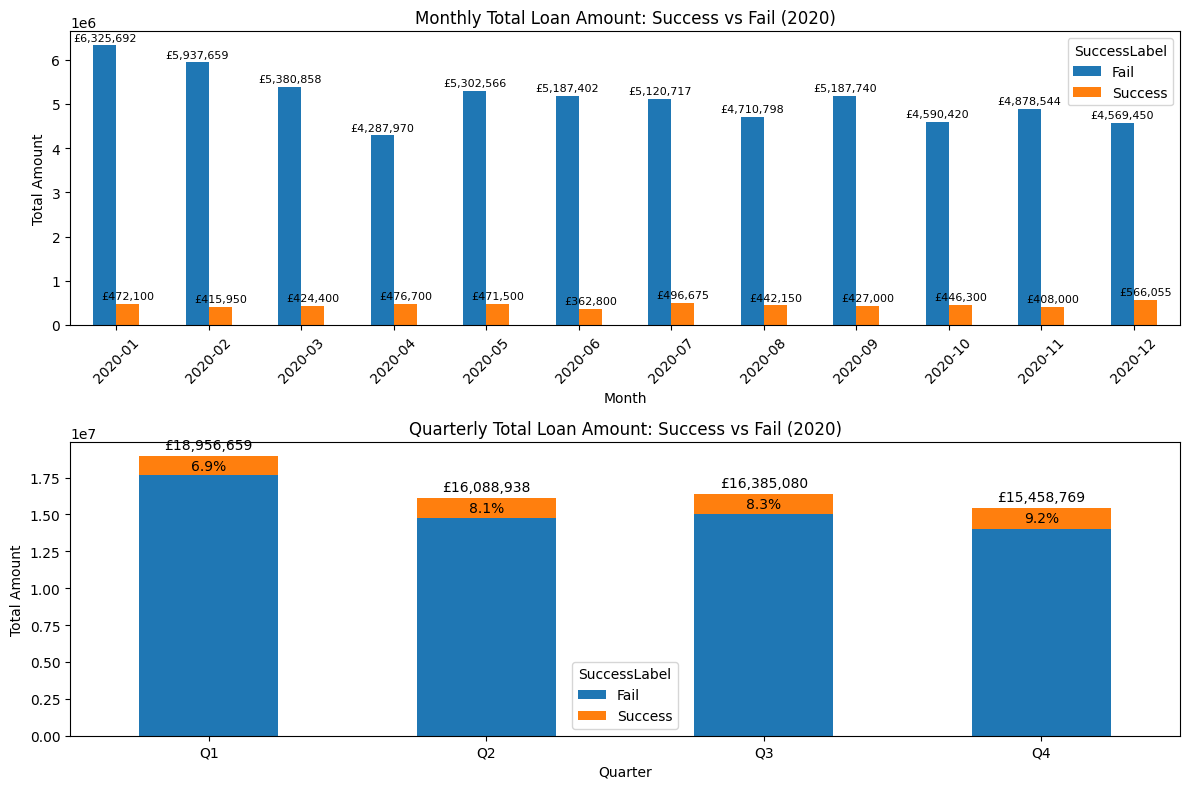

In [40]:
# Monthly amount data
monthly_amount = (
    application_sample.groupby(["Month", "SuccessLabel"])["Amount"]
           .sum()
           .unstack(fill_value=0)
)

# Quarterly amount data
application_sample["Quarter"] = application_sample["Month"].dt.quarter
quarterly_amount = (
    application_sample.groupby(["Quarter", "SuccessLabel"])["Amount"]
           .sum()
           .unstack(fill_value=0)
)

# Calculate quarterly totals and success percentage
quarterly_amount["Total"] = quarterly_amount["Fail"] + quarterly_amount["Success"]
quarterly_amount["Success_Pct"] = (quarterly_amount["Success"] / quarterly_amount["Total"] * 100).round(1)

# Create figure with 2 rows
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# ===== Row 1: Monthly Loan Amount =====
ax1 = axes[0]
monthly_amount.index = monthly_amount.index.strftime("%Y-%m")
monthly_amount.plot(kind="bar", ax=ax1)
ax1.set_title("Monthly Total Loan Amount: Success vs Fail (2020)")
ax1.set_xlabel("Month")
ax1.set_ylabel("Total Amount")
ax1.tick_params(axis='x', rotation=45)

# Custom formatted labels for monthly chart (£ and thousands separator)
for container in ax1.containers:
    ax1.bar_label(container, labels=[f"£{v:,.0f}" for v in container.datavalues], padding=2, fontsize=8)

# ===== Row 2: Quarterly Loan Amount with Success % =====
ax2 = axes[1]
quarterly_amount.index = ["Q1", "Q2", "Q3", "Q4"]
quarterly_amount[["Fail", "Success"]].plot(kind="bar", stacked=True, ax=ax2)
ax2.set_title("Quarterly Total Loan Amount: Success vs Fail (2020)")
ax2.set_xlabel("Quarter")
ax2.set_ylabel("Total Amount")
ax2.tick_params(axis='x', rotation=0)

# Labels: Total on top, Success percentage inside success bar
bars_fail, bars_success = ax2.containers

# Total amount on top of each stacked bar
ax2.bar_label(bars_success, labels=[f"£{t:,.0f}" for t in quarterly_amount["Total"]], label_type="edge", padding=3)

# Success percentage inside success bar
ax2.bar_label(bars_success, labels=[f"{p}%" for p in quarterly_amount["Success_Pct"]], label_type="center")

plt.tight_layout()
plt.show()

### Visualise the number of favourite term throughout 2020. <br>

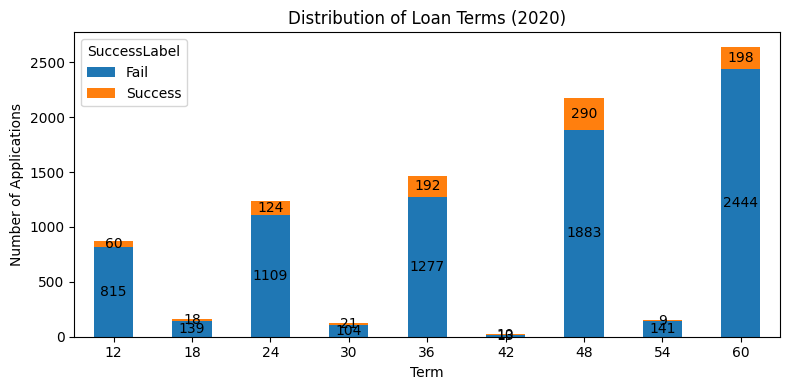

In [8]:
term_split = (
    application_sample.groupby(["Term", "SuccessLabel"])["UID"]
           .count()
           .unstack(fill_value=0)
           .sort_index()
)

fig, ax = plt.subplots(figsize=(8, 4))
term_split.plot(kind="bar", stacked=True, ax=ax)

ax.set_title("Distribution of Loan Terms (2020)")
ax.set_xlabel("Term")
ax.set_ylabel("Number of Applications")
plt.xticks(rotation=0)

# Explicitly label Fail and Success segments only
bars_fail, bars_success = ax.containers  # order: [Fail, Success]

ax.bar_label(bars_fail,
             labels=term_split["Fail"].astype(int),
             label_type="center")
ax.bar_label(bars_success,
             labels=term_split["Success"].astype(int),
             label_type="center")

plt.tight_layout()
plt.show()


### Visualise majority of the lenders in term of the employment type throughout 2020. <br>


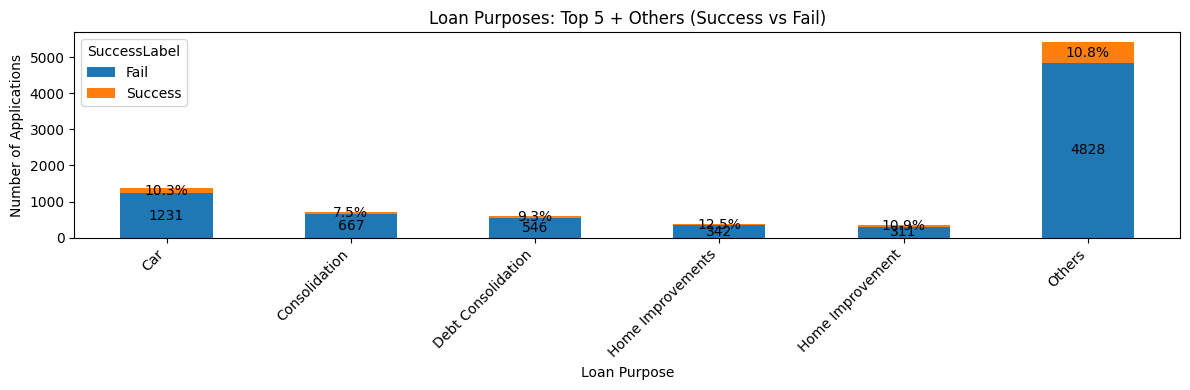

In [30]:
# Normalise loan purpose text
application_sample["LoanPurpose_clean"] = (
    application_sample["LoanPurpose"]
        .astype(str)
        .str.strip()
        .str.lower()
)

# Get top 5 by raw count, EXCLUDING "other"
top5 = (
    application_sample[application_sample["LoanPurpose_clean"] != "other"]["LoanPurpose_clean"]
        .value_counts()
        .head(5)
)
top5_names = top5.index.tolist()

# Create grouped column: keep top 5, rename rest (including "other") to "others"
application_sample["LoanPurpose_grouped"] = application_sample["LoanPurpose_clean"].apply(
    lambda x: x if x in top5_names else "others"
)

# Split success/fail
purpose_split = (
    application_sample.groupby(["LoanPurpose_grouped", "SuccessLabel"])["UID"]
          .count()
          .unstack(fill_value=0)
)

# Reorder: top 5 in descending order, then "others" at the end
order = top5_names + ["others"]
purpose_split = purpose_split.loc[order]

# Calculate success percentage
purpose_split["Total"] = purpose_split["Fail"] + purpose_split["Success"]
purpose_split["Success_Pct"] = (purpose_split["Success"] / purpose_split["Total"] * 100).round(1)

# Beautify labels
purpose_split.index = purpose_split.index.str.title()

fig, ax = plt.subplots(figsize=(12, 4))

# Plot in correct order (only Fail and Success columns)
purpose_split[["Fail", "Success"]].plot(kind="bar", stacked=True, ax=ax)

ax.set_title("Loan Purposes: Top 5 + Others (Success vs Fail)")
ax.set_xlabel("Loan Purpose")
ax.set_ylabel("Number of Applications")
plt.xticks(rotation=45, ha="right")

# Labels: Fail count + Success percentage
bars_fail, bars_success = ax.containers

ax.bar_label(bars_fail, labels=purpose_split["Fail"].astype(int), label_type="center")
ax.bar_label(bars_success, labels=[f"{p}%" for p in purpose_split["Success_Pct"]], label_type="center")

plt.tight_layout()
plt.show()

### What are the loan purposes from the lender throughout 2020?

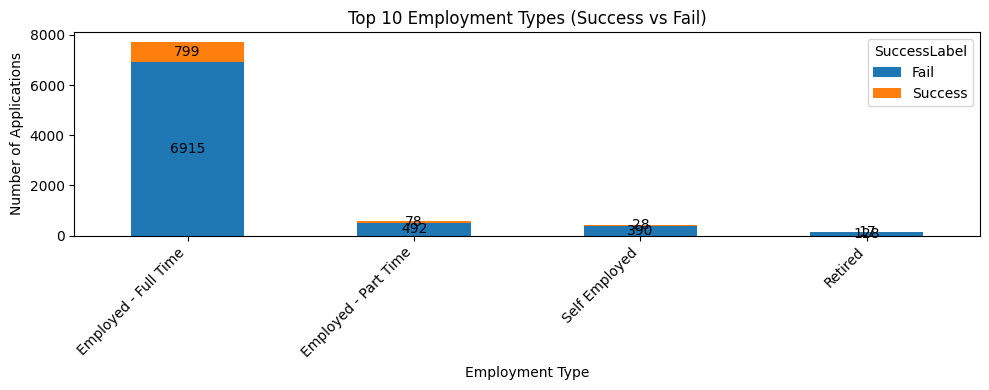

In [10]:
# Normalise EmploymentType text
application_sample["EmploymentType_clean"] = (
    application_sample["EmploymentType"]
        .astype(str)
        .str.strip()
        .str.lower()
)

# Get top 10 employment types by count
top10_emp = (
    application_sample["EmploymentType_clean"]
        .value_counts()
        .head(10)
)

top10_emp_names = top10_emp.index

# Filter data to only top 10
df_emp = application_sample[application_sample["EmploymentType_clean"].isin(top10_emp_names)]

# Compute success/fail count per employment type
emp_split = (
    df_emp.groupby(["EmploymentType_clean", "SuccessLabel"])["UID"]
          .count()
          .unstack(fill_value=0)
)

# Reorder rows to match top 10 order (descending)
emp_split = emp_split.loc[top10_emp_names]

# Beautify labels
emp_split.index = emp_split.index.str.title()

fig, ax = plt.subplots(figsize=(10, 4))

# Stacked bar chart
emp_split.plot(kind="bar", stacked=True, ax=ax)

ax.set_title("Top 10 Employment Types (Success vs Fail)")
ax.set_xlabel("Employment Type")
ax.set_ylabel("Number of Applications")
plt.xticks(rotation=45, ha="right")

# Add labels for Fail + Success
bars_fail, bars_success = ax.containers  # order: Fail first, Success second

ax.bar_label(bars_fail, labels=emp_split["Fail"].astype(int), label_type="center")
ax.bar_label(bars_success, labels=emp_split["Success"].astype(int), label_type="center")

plt.tight_layout()
plt.show()


## Credit History Understanding

In [11]:
# a subset of credit features that describe the credit file associated with the applicant.
credit_features = pd.read_csv('data/credit_features.csv')
credit_features.head()

# Add success information from the application_sample table.
credit_features = credit_features.merge(
    application_sample[['UID', 'Success']], 
    on='UID', 
    how='left'
)

In [12]:
display(credit_features.info())
print('--------------------------------')

# show sample data
display(credit_features.tail())
print('--------------------------------')

# show the tabular distribution of credit features
display(credit_features.describe())
print('--------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   UID                                   8847 non-null   int64  
 1   ALL_AgeOfOldestAccount                8847 non-null   int64  
 2   ALL_AgeOfYoungestAccount              8847 non-null   int64  
 3   ALL_Count                             8847 non-null   int64  
 4   ALL_CountActive                       8847 non-null   int64  
 5   ALL_CountClosedLast12Months           8847 non-null   int64  
 6   ALL_CountDefaultAccounts              8847 non-null   int64  
 7   ALL_CountOpenedLast12Months           8847 non-null   int64  
 8   ALL_CountSettled                      8847 non-null   int64  
 9   ALL_MeanAccountAge                    8847 non-null   float64
 10  ALL_SumCurrentOutstandingBal          8847 non-null   int64  
 11  ALL_SumCurrentOut

None

--------------------------------


,UID,ALL_AgeOfOldestAccount,ALL_AgeOfYoungestAccount,ALL_Count,ALL_CountActive,ALL_CountClosedLast12Months,ALL_CountDefaultAccounts,ALL_CountOpenedLast12Months,ALL_CountSettled,ALL_MeanAccountAge,ALL_SumCurrentOutstandingBal,ALL_SumCurrentOutstandingBalExcMtg,ALL_TimeSinceMostRecentDefault,ALL_WorstPaymentStatusActiveAccounts,Success
8842,9679857,399,13,23,16,0,0,0,7,118.09,187302,23018,-1,0,0
8843,9680193,217,23,5,4,0,0,0,1,85.40,264,264,-1,0,0
8844,9681405,3,1,2,2,0,0,2,0,2.00,0,0,-1,0,0
8845,9684198,178,15,23,17,0,1,0,6,66.91,10071,10071,-1,7,0
8846,9684478,81,3,12,11,1,0,5,1,20.50,18862,18862,-1,0,0


--------------------------------


,UID,ALL_AgeOfOldestAccount,ALL_AgeOfYoungestAccount,ALL_Count,ALL_CountActive,ALL_CountClosedLast12Months,ALL_CountDefaultAccounts,ALL_CountOpenedLast12Months,ALL_CountSettled,ALL_MeanAccountAge,ALL_SumCurrentOutstandingBal,ALL_SumCurrentOutstandingBalExcMtg,ALL_TimeSinceMostRecentDefault,ALL_WorstPaymentStatusActiveAccounts,Success
count,8.847000e+03,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8.847000e+03,8847.000000,8847.0,8847.000000,8847.000000
mean,4.753101e+06,162.694021,8.587431,17.515316,9.258506,1.589691,1.380355,2.453487,8.231491,57.285159,5.416258e+04,12858.636148,-1.0,2.057647,0.104216
std,2.766232e+06,94.569878,13.081866,13.900171,4.896900,2.611921,2.749450,2.964837,11.419963,29.132180,1.074432e+05,17756.568825,0.0,3.139938,0.305558
min,2.160090e+05,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.0,-1.000000,0.000000
25%,2.376933e+06,100.000000,2.000000,9.000000,6.000000,0.000000,0.000000,1.000000,2.000000,38.770000,3.396000e+03,2438.000000,-1.0,0.000000,0.000000
50%,4.463541e+06,151.000000,5.000000,15.000000,9.000000,1.000000,0.000000,2.000000,5.000000,53.120000,1.267000e+04,8336.000000,-1.0,0.000000,0.000000
75%,7.194733e+06,212.000000,10.000000,22.000000,12.000000,2.000000,2.000000,3.000000,10.000000,71.530000,6.171250e+04,17990.500000,-1.0,7.000000,0.000000
max,9.684478e+06,999.000000,258.000000,233.000000,43.000000,60.000000,23.000000,62.000000,215.000000,304.000000,4.004808e+06,581415.000000,-1.0,7.000000,1.000000


--------------------------------


### Understanding its value inside columns

In [13]:
# Best way: Count unique values for each column

unique_counts = credit_features.drop(['Success'], axis=1).select_dtypes(include=[np.number]).nunique().sort_values()

unique_summary = pd.DataFrame({
    'Column': unique_counts.index,
    'Unique_Values': unique_counts.values
})

print("Unique value counts for each column:")
print("=" * 80)
display(unique_summary)

Unique value counts for each column:


,Column,Unique_Values
0,ALL_TimeSinceMostRecentDefault,1
1,ALL_WorstPaymentStatusActiveAccounts,9
2,ALL_CountDefaultAccounts,24
3,ALL_CountOpenedLast12Months,33
4,ALL_CountClosedLast12Months,36
5,ALL_CountActive,39
6,ALL_CountSettled,106
7,ALL_AgeOfYoungestAccount,115
8,ALL_Count,116
9,ALL_AgeOfOldestAccount,472


### Understanding whether the uid in both table has one-to-one relationship

In [14]:
# The UID has one-to-one match between two tables.

only_in_1 = set(application_sample['UID']) - set(credit_features['UID'])
only_in_2 = set(credit_features['UID']) - set(application_sample['UID'])

print(only_in_1)
print(only_in_2)

# Find any duplicates
dup1 = application_sample[application_sample['UID'].duplicated(keep=False)]
dup2 = credit_features[credit_features['UID'].duplicated(keep=False)]

if not dup1.empty:
    print(f"⚠️ Table 1 has {len(dup1)} duplicate UID rows")
if not dup2.empty:
    print(f"⚠️ Table 2 has {len(dup2)} duplicate UID rows")
if dup1.empty and dup2.empty:
    print("✓ Both tables have unique UIDs - one-to-one relationship exists")

set()
set()
✓ Both tables have unique UIDs - one-to-one relationship exists


### Finding: Perfect Separation

**No Credit History = Automatic Rejection**

- `ALL_Count = 0` → **100% failure rate** (no exceptions in 2020)
- This creates **quasi-perfect separation**, breaking logistic regression assumptions
- **Action:** Exclude these cases from modelling; treat as a business rule

> **Insight:** Credit history is a hard prerequisite for loan approval.

Success Rate by ALL_Count Status:


,Total Applications,Successful,Failed,Success Rate
ALL_Count_Category,,,,
Has Accounts (>0),8739,922,7817,0.1055
No Accounts (0),108,0,108,0.0000


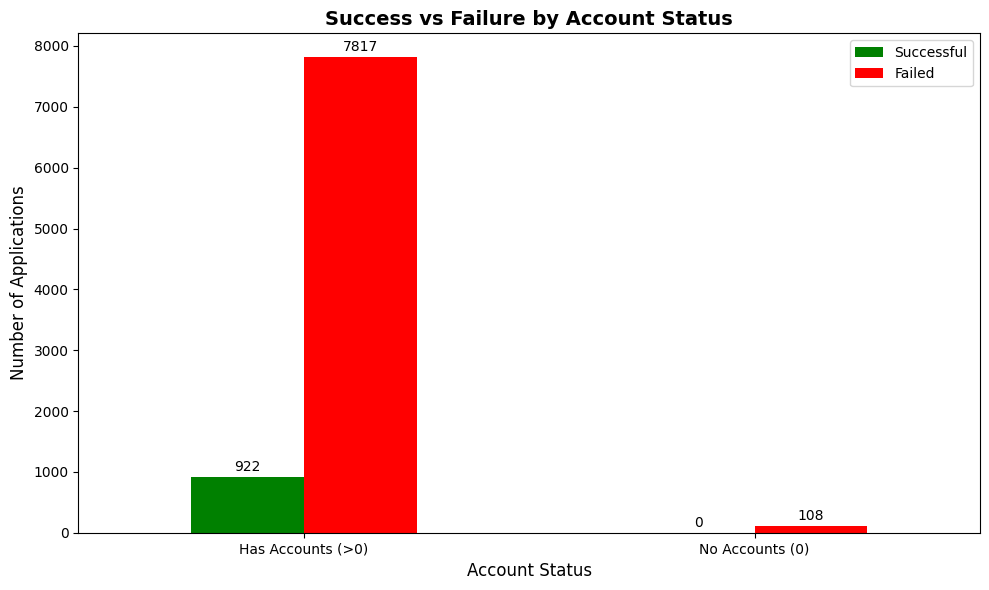

In [15]:
# Merge the two tables on UID
merged_df = application_sample.merge(credit_features[['UID', 'ALL_Count']], on='UID', how='inner')

# Create a categorical column for ALL_Count
merged_df['ALL_Count_Category'] = merged_df['ALL_Count'].apply(
    lambda x: 'No Accounts (0)' if x == 0 else 'Has Accounts (>0)'
)

# Calculate success rate by ALL_Count category
success_by_all_count = merged_df.groupby('ALL_Count_Category').agg({
    'Success': ['sum', 'count', 'mean']
}).round(4)

# Rename columns for clarity
success_by_all_count.columns = ['Successful', 'Total Applications', 'Success Rate']
success_by_all_count['Failed'] = success_by_all_count['Total Applications'] - success_by_all_count['Successful']

# Reorder columns
success_by_all_count = success_by_all_count[['Total Applications', 'Successful', 'Failed', 'Success Rate']]

print("Success Rate by ALL_Count Status:")
display(success_by_all_count)

# Visualize with a single chart
fig, ax = plt.subplots(figsize=(10, 6))

success_by_all_count[['Successful', 'Failed']].plot(kind='bar', ax=ax, color=['green', 'red'])
ax.set_title('Success vs Failure by Account Status', fontsize=14, fontweight='bold')
ax.set_xlabel('Account Status', fontsize=12)
ax.set_ylabel('Number of Applications', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(['Successful', 'Failed'], loc='upper right')
add_bar_labels(ax)

plt.tight_layout()
plt.show()

In [16]:
# Get all numeric columns (exclude UID and Success)
numeric_cols = credit_features.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['UID', 'Success']]

# ============== MEANS COMPARISON TABLE ==============
means_comparison = credit_features.groupby('Success')[numeric_cols].mean().T
means_comparison.columns = ['Mean_Failed', 'Mean_Success']
means_comparison['Difference'] = means_comparison['Mean_Success'] - means_comparison['Mean_Failed']
means_comparison['Pct_Change'] = ((means_comparison['Mean_Success'] - means_comparison['Mean_Failed']) / 
                                   means_comparison['Mean_Failed'] * 100).round(2)

# Sort by absolute difference
means_comparison['Abs_Diff'] = means_comparison['Difference'].abs()
means_comparison = means_comparison.sort_values('Abs_Diff', ascending=False)
means_comparison = means_comparison.drop('Abs_Diff', axis=1)

print("=" * 80)
print("MEAN COMPARISON: Success vs Failed")
print("=" * 80)
display(means_comparison)

# ============== MEDIANS COMPARISON TABLE ==============
medians_comparison = credit_features.groupby('Success')[numeric_cols].median().T
medians_comparison.columns = ['Median_Failed', 'Median_Success']
medians_comparison['Difference'] = medians_comparison['Median_Success'] - medians_comparison['Median_Failed']
medians_comparison['Pct_Change'] = ((medians_comparison['Median_Success'] - medians_comparison['Median_Failed']) / 
                                     medians_comparison['Median_Failed'] * 100).round(2)

# Sort by absolute difference
medians_comparison['Abs_Diff'] = medians_comparison['Difference'].abs()
medians_comparison = medians_comparison.sort_values('Abs_Diff', ascending=False)
medians_comparison = medians_comparison.drop('Abs_Diff', axis=1)

print("\n")
print("=" * 80)
print("MEDIAN COMPARISON: Success vs Failed")
print("=" * 80)
display(medians_comparison)

MEAN COMPARISON: Success vs Failed


,Mean_Failed,Mean_Success,Difference,Pct_Change
ALL_SumCurrentOutstandingBal,52585.902334,67714.863341,15128.961006,28.77
ALL_SumCurrentOutstandingBalExcMtg,13214.190410,9802.489154,-3411.701256,-25.82
ALL_AgeOfOldestAccount,160.280757,183.437093,23.156336,14.45
ALL_MeanAccountAge,56.256206,66.129469,9.873263,17.55
ALL_Count,17.727823,15.688720,-2.039103,-11.50
ALL_WorstPaymentStatusActiveAccounts,2.249464,0.408894,-1.840570,-81.82
ALL_CountDefaultAccounts,1.511041,0.257050,-1.253991,-82.99
ALL_CountActive,9.366183,8.332972,-1.033211,-11.03
ALL_CountSettled,8.333375,7.355748,-0.977627,-11.73
ALL_CountOpenedLast12Months,2.528454,1.809111,-0.719344,-28.45




MEDIAN COMPARISON: Success vs Failed


,Median_Failed,Median_Success,Difference,Pct_Change
ALL_SumCurrentOutstandingBal,12393.00,17046.0,4653.00,37.55
ALL_SumCurrentOutstandingBalExcMtg,8646.00,6434.5,-2211.50,-25.58
ALL_AgeOfOldestAccount,148.00,169.0,21.00,14.19
ALL_MeanAccountAge,52.12,61.7,9.58,18.38
ALL_AgeOfYoungestAccount,5.00,6.0,1.00,20.00
ALL_Count,15.00,14.0,-1.00,-6.67
ALL_CountActive,9.00,8.0,-1.00,-11.11
ALL_CountOpenedLast12Months,2.00,1.5,-0.50,-25.00
ALL_CountClosedLast12Months,1.00,1.0,0.00,0.00
ALL_CountDefaultAccounts,0.00,0.0,0.00,NaN


## Key indicator of Loan Success

In [17]:
credit_features.head()

,UID,ALL_AgeOfOldestAccount,ALL_AgeOfYoungestAccount,ALL_Count,ALL_CountActive,ALL_CountClosedLast12Months,ALL_CountDefaultAccounts,ALL_CountOpenedLast12Months,ALL_CountSettled,ALL_MeanAccountAge,ALL_SumCurrentOutstandingBal,ALL_SumCurrentOutstandingBalExcMtg,ALL_TimeSinceMostRecentDefault,ALL_WorstPaymentStatusActiveAccounts,Success
0,216009,227,12,14,11,0,3,0,3,71.36,9292,9292,-1,7,0
1,217537,49,10,7,6,1,3,1,1,29.33,4592,4592,-1,7,0
2,221803,134,0,12,11,0,3,5,1,32.33,2737,2737,-1,7,0
3,222260,227,2,39,12,0,2,2,27,41.56,9229,9229,-1,7,0
4,222848,132,2,99,11,8,0,9,88,43.34,15443,15443,-1,0,0


In [42]:
display(application_sample.head())

application_model_df = application_sample[['UID', 'Month', 'Amount', 'Term', 'EmploymentType', 'LoanPurpose_grouped', 'Success']]

,UID,ApplicationDate,Amount,Term,EmploymentType,LoanPurpose,Success,Month,SuccessLabel,LoanPurpose_clean,EmploymentType_clean,LoanPurpose_grouped,Quarter
0,4921736,2020-07-03,2000,60,Employed - full time,Unexpected bills,0,2020-07-01,Fail,unexpected bills,employed - full time,others,3
1,1241981,2020-02-04,3000,60,Employed - full time,Starting new bussniess,0,2020-02-01,Fail,starting new bussniess,employed - full time,others,1
2,5751748,2020-08-02,20000,60,Employed - full time,Business capital,0,2020-08-01,Fail,business capital,employed - full time,others,3
3,7163425,2020-09-23,20000,60,Self employed,New business venture,0,2020-09-01,Fail,new business venture,self employed,others,3
4,227377,2020-01-01,5000,36,Employed - full time,car,0,2020-01-01,Fail,car,employed - full time,car,1


In [43]:
# Create Quarter column from Month
application_model_df["Quarter"] = application_model_df["Month"].dt.quarter

# Drop the Month column
application_model_df = application_model_df.drop(columns=["Month"])

# One-hot encode Term, EmploymentType, LoanPurpose_grouped, and Quarter columns
application_model_df = pd.get_dummies(
    application_model_df,
    columns=['Term', 'EmploymentType', 'LoanPurpose_grouped', 'Quarter'],
    drop_first=True,  # Avoid dummy variable trap
    dtype=int  # Use 0/1 integers instead of True/False
)

# View the new columns created
print("New columns after one-hot encoding:")
encoded_cols = [col for col in application_model_df.columns if 'Term_' in col or 'EmploymentType_' in col or 'LoanPurpose_grouped_' in col or 'Quarter_' in col]
print(encoded_cols)

# Check the shape
print(f"\nDataFrame shape: {application_model_df.shape}")

# Preview
display(application_model_df.head())

New columns after one-hot encoding:
['Term_18', 'Term_24', 'Term_30', 'Term_36', 'Term_42', 'Term_48', 'Term_54', 'Term_60', 'EmploymentType_Employed - part time', 'EmploymentType_Retired', 'EmploymentType_Self employed', 'LoanPurpose_grouped_consolidation', 'LoanPurpose_grouped_debt consolidation', 'LoanPurpose_grouped_home improvement', 'LoanPurpose_grouped_home improvements', 'LoanPurpose_grouped_others', 'Quarter_2', 'Quarter_3', 'Quarter_4']

DataFrame shape: (8847, 22)


/var/folders/hf/0mp7k_vd30z8kr8nkwwh037m0000gn/T/ipykernel_54251/1726539265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_model_df["Quarter"] = application_model_df["Month"].dt.quarter


,UID,Amount,Success,Term_18,Term_24,Term_30,Term_36,Term_42,Term_48,Term_54,...,EmploymentType_Retired,EmploymentType_Self employed,LoanPurpose_grouped_consolidation,LoanPurpose_grouped_debt consolidation,LoanPurpose_grouped_home improvement,LoanPurpose_grouped_home improvements,LoanPurpose_grouped_others,Quarter_2,Quarter_3,Quarter_4
0,4921736,2000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1241981,3000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,5751748,20000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,7163425,20000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,227377,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
combined_model_features_df = pd.merge(application_model_df, credit_features.drop(['Success'], axis=1), on='UID', how='inner')
combined_model_features_df = combined_model_features_df[combined_model_features_df.ALL_Count != 0]

In [62]:
import statsmodels.api as sm
import numpy as np

# Define target and features
y = combined_model_features_df['Success']
feature_cols = [col for col in combined_model_features_df.columns if col not in ['UID', 'Success']]

# Store results
results_list = []

# Run univariate logistic regression for each feature
for feature in feature_cols:
    X = combined_model_features_df[[feature]]
    X_const = sm.add_constant(X)
    
    try:
        model = sm.Logit(y, X_const)
        result = model.fit(disp=0)  # disp=0 suppresses output
        
        # Extract statistics
        coef = result.params[feature]
        odds_ratio = np.exp(coef)
        p_value = result.pvalues[feature]
        ci_lower = np.exp(result.conf_int().loc[feature, 0])
        ci_upper = np.exp(result.conf_int().loc[feature, 1])
        
        results_list.append({
            'Feature': feature,
            'Coefficient': round(coef, 4),
            'Odds_Ratio': round(odds_ratio, 4),
            'CI_Lower': round(ci_lower, 4),
            'CI_Upper': round(ci_upper, 4),
            'P_Value': round(p_value, 4),
            'Significant': '✓' if p_value < 0.05 else ''
        })
    except Exception as e:
        results_list.append({
            'Feature': feature,
            'Coefficient': None,
            'Odds_Ratio': None,
            'CI_Lower': None,
            'CI_Upper': None,
            'P_Value': None,
            'Significant': f'Error: {str(e)}'
        })

# Create results DataFrame
univariate_results = pd.DataFrame(results_list)

# Sort by p-value (most significant first)
univariate_results = univariate_results.sort_values('P_Value').reset_index(drop=True)

print("Univariate Logistic Regression Results")
print("=" * 80)
print(f"Total features: {len(feature_cols)}")
print(f"Significant features (p < 0.05): {len(univariate_results[univariate_results['Significant'] == '✓'])}")
print("=" * 80)

display(univariate_results)

# Show only significant features
print("\n\nSignificant Features Only (p < 0.05):")
print("=" * 80)
display(univariate_results[univariate_results['Significant'] == '✓'])

Univariate Logistic Regression Results
Total features: 33
Significant features (p < 0.05): 23


,Feature,Coefficient,Odds_Ratio,CI_Lower,CI_Upper,P_Value,Significant
0,Amount,-0.0001,0.9999,0.9999,0.9999,0.0000,✓
1,ALL_SumCurrentOutstandingBalExcMtg,-0.0000,1.0000,1.0000,1.0000,0.0000,✓
2,ALL_MeanAccountAge,0.0097,1.0097,1.0076,1.0119,0.0000,✓
3,ALL_CountOpenedLast12Months,-0.1426,0.8671,0.8368,0.8985,0.0000,✓
4,ALL_CountDefaultAccounts,-0.5087,0.6013,0.5526,0.6543,0.0000,✓
5,ALL_CountActive,-0.0568,0.9448,0.9300,0.9599,0.0000,✓
6,ALL_Count,-0.0157,0.9844,0.9781,0.9907,0.0000,✓
7,ALL_AgeOfOldestAccount,0.0021,1.0021,1.0014,1.0027,0.0000,✓
8,ALL_TimeSinceMostRecentDefault,2.1375,8.4783,7.9190,9.0771,0.0000,✓
9,ALL_WorstPaymentStatusActiveAccounts,-0.3147,0.7300,0.6998,0.7614,0.0000,✓




Significant Features Only (p < 0.05):


,Feature,Coefficient,Odds_Ratio,CI_Lower,CI_Upper,P_Value,Significant
0,Amount,-0.0001,0.9999,0.9999,0.9999,0.0000,✓
1,ALL_SumCurrentOutstandingBalExcMtg,-0.0000,1.0000,1.0000,1.0000,0.0000,✓
2,ALL_MeanAccountAge,0.0097,1.0097,1.0076,1.0119,0.0000,✓
3,ALL_CountOpenedLast12Months,-0.1426,0.8671,0.8368,0.8985,0.0000,✓
4,ALL_CountDefaultAccounts,-0.5087,0.6013,0.5526,0.6543,0.0000,✓
5,ALL_CountActive,-0.0568,0.9448,0.9300,0.9599,0.0000,✓
6,ALL_Count,-0.0157,0.9844,0.9781,0.9907,0.0000,✓
7,ALL_AgeOfOldestAccount,0.0021,1.0021,1.0014,1.0027,0.0000,✓
8,ALL_TimeSinceMostRecentDefault,2.1375,8.4783,7.9190,9.0771,0.0000,✓
9,ALL_WorstPaymentStatusActiveAccounts,-0.3147,0.7300,0.6998,0.7614,0.0000,✓


In [64]:
combined_model_features_df

,UID,Amount,Success,Term_18,Term_24,Term_30,Term_36,Term_42,Term_48,Term_54,Term_60,EmploymentType_Employed - part time,EmploymentType_Retired,EmploymentType_Self employed,LoanPurpose_grouped_consolidation,LoanPurpose_grouped_debt consolidation,LoanPurpose_grouped_home improvement,LoanPurpose_grouped_home improvements,LoanPurpose_grouped_others,Quarter_2,Quarter_3,Quarter_4,ALL_AgeOfOldestAccount,ALL_AgeOfYoungestAccount,ALL_Count,ALL_CountActive,ALL_CountClosedLast12Months,ALL_CountDefaultAccounts,ALL_CountOpenedLast12Months,ALL_CountSettled,ALL_MeanAccountAge,ALL_SumCurrentOutstandingBal,ALL_SumCurrentOutstandingBalExcMtg,ALL_TimeSinceMostRecentDefault,ALL_WorstPaymentStatusActiveAccounts
0,4921736,2000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,162,17,18,12,0,0,0,6,70.94,68555,15019,-1,0
1,1241981,3000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,266,30,14,10,0,4,0,4,104.79,2209,2209,-1,7
2,5751748,20000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,90,52,4,2,0,1,0,2,68.25,5108,5108,-1,7
3,7163425,20000,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,163,19,14,6,1,1,0,8,67.50,25738,25738,-1,0
4,227377,5000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,2,38,19,4,9,8,19,56.45,5801,5801,-1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8842,8681053,5000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,164,2,22,16,2,0,5,6,52.36,10968,10968,-1,0
8843,8768469,8000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,275,20,7,4,1,1,0,3,73.57,2204,2204,-1,7
8844,8794971,1000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,145,8,14,13,0,0,1,1,44.14,6786,6786,-1,0
8845,8875138,10000,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,12,7,4,3,1,0,3,1,9.25,9398,9398,-1,0


In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Get feature columns (exclude UID and Success)
feature_cols = [col for col in combined_model_features_df.columns if col not in ['UID', 'Success']]

# Prepare feature matrix
X = combined_model_features_df[feature_cols]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = feature_cols
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort by VIF (highest first)
vif_data = vif_data.sort_values("VIF", ascending=False).reset_index(drop=True)

# Add interpretation
def vif_status(vif):
    if vif > 10:
        return "❌ High - Remove"
    elif vif > 5:
        return "⚠️ Moderate - Consider"
    else:
        return "✅ OK"

vif_data["Status"] = vif_data["VIF"].apply(vif_status)

print("Variance Inflation Factor (VIF) Analysis")
print("=" * 80)
print("VIF > 10: High multicollinearity - MUST remove")
print("VIF 5-10: Moderate - Consider removing")
print("VIF < 5: Acceptable")
print("=" * 80)

display(vif_data)

# Summary
high_vif = vif_data[vif_data["VIF"] > 10]
moderate_vif = vif_data[(vif_data["VIF"] > 5) & (vif_data["VIF"] <= 10)]

print(f"\n\n📊 Summary:")
print(f"   Features with VIF > 10 (must remove): {len(high_vif)}")
print(f"   Features with VIF 5-10 (consider removing): {len(moderate_vif)}")
print(f"   Features with VIF < 5 (OK): {len(vif_data) - len(high_vif) - len(moderate_vif)}")

if len(high_vif) > 0:
    print(f"\n\n❌ High VIF Features to Remove:")
    display(high_vif)

Variance Inflation Factor (VIF) Analysis
VIF > 10: High multicollinearity - MUST remove
VIF 5-10: Moderate - Consider removing
VIF < 5: Acceptable


,Feature,VIF,Status
0,ALL_Count,212358.732358,❌ High - Remove
1,ALL_CountSettled,145029.838156,❌ High - Remove
2,ALL_CountActive,25411.507437,❌ High - Remove
3,ALL_TimeSinceMostRecentDefault,30.824831,❌ High - Remove
4,Term_60,3.900344,✅ OK
5,ALL_MeanAccountAge,3.776289,✅ OK
6,Term_48,3.112430,✅ OK
7,ALL_AgeOfOldestAccount,3.001896,✅ OK
8,ALL_CountClosedLast12Months,2.910491,✅ OK
9,ALL_CountOpenedLast12Months,2.849507,✅ OK




📊 Summary:
   Features with VIF > 10 (must remove): 4
   Features with VIF 5-10 (consider removing): 0
   Features with VIF < 5 (OK): 29


❌ High VIF Features to Remove:


,Feature,VIF,Status
0,ALL_Count,212358.732358,❌ High - Remove
1,ALL_CountSettled,145029.838156,❌ High - Remove
2,ALL_CountActive,25411.507437,❌ High - Remove
3,ALL_TimeSinceMostRecentDefault,30.824831,❌ High - Remove
